<a href="https://colab.research.google.com/drive/1iPoxjLel1b09HePLToKr6r1XRrUZVEBk?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open This File In Colab "/></a>




# **[Dataset](https://drive.google.com/drive/folders/1ORGXLuAauH1yoHLh31g8f3HMaaGHVx2_?usp=share_link)**



#IMPORTING REQUIRED LIBRARIES

In [ ]:
import librosa #sound/audio analysis
import soundfile #sound/audio analysis
import os, glob, pickle #os-directory reading, pickle-processed data is stored in pickle format
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import shutil #file_ops
import pandas as pd
import matplotlib.pyplot as plt
import random
import librosa.display
import IPython.display as ipd
from IPython.core.display import display

#DATA PREPARATION

##RAVDESS DATASET

In [ ]:
ravdess_paths = sorted(filter(os.path.isfile, glob.glob('/content/drive/MyDrive/Speech Emotion Recognition/speech-emotion-recognition-data/RAVDESS/*/*.wav')))

filenames_r, duration_r, sr_r, gender_r, emotion_r = [], [], [], [], []

for file in ravdess_paths:
    
    filenames_r.append(os.path.basename(file))
    
    duration_r.append(round(librosa.get_duration(filename=file), 3))
    
    sr_r.append(librosa.get_samplerate(file))
    
    if int(file[-6:-4])%2 == 0:
        gender_r.append('female')
    else:
        gender_r.append('male')

for file in filenames_r:
    if file[6:8] == '01':
        emotion_r.append('neutral')
    elif file[6:8] == '02':
        emotion_r.append('calm')
    elif file[6:8] == '03':
        emotion_r.append('happy')
    elif file[6:8] == '04':
        emotion_r.append('sad')
    elif file[6:8] == '05':
        emotion_r.append('angry')
    elif file[6:8] == '06':
        emotion_r.append('fear')
    elif file[6:8] == '07':
        emotion_r.append('disgust')
    elif file[6:8] == '08':
        emotion_r.append('surprise')
    
df_r = pd.DataFrame({'path': ravdess_paths,
                   'filename': filenames_r,
                   'dataset' : 'RAVDESS',
                   'duration' : duration_r,
                   'sample_rate' : sr_r,
                   'gender': gender_r,
                   'age' : 26,             # from the documentation: M = 26.0 years; SD = 3.75; age range = 21–33, individual age data is missing
                   'emotion' : emotion_r})

df_r.sample(3)

,path,filename,dataset,duration,sample_rate,gender,age,emotion
1062,/content/drive/MyDrive/Speech Emotion Recognit...,03-01-06-02-02-01-18.wav,RAVDESS,3.804,16000,female,26,fear
19,/content/drive/MyDrive/Speech Emotion Recognit...,03-01-03-02-02-02-01.wav,RAVDESS,3.937,16000,male,26,happy
1279,/content/drive/MyDrive/Speech Emotion Recognit...,03-01-03-02-02-02-22.wav,RAVDESS,3.937,16000,female,26,happy


##TESS DATASET

In [ ]:
tess_paths = sorted(filter(os.path.isfile, glob.glob('/content/drive/MyDrive/Speech Emotion Recognition/speech-emotion-recognition-data/TESS/*.wav')))

filenames_t, duration_t, sr_t, age_t, emotion_t = [], [], [], [], []

for file in tess_paths:
    
    filenames_t.append(os.path.basename(file))
    
    duration_t.append(round(librosa.get_duration(filename=file), 3)) 
    
    sr_t.append(librosa.get_samplerate(file))

for file in filenames_t:    
    if file[0:3] == 'OAF':
        age_t.append(64)
    else:
        age_t.append(26)
    splitted = file.split('_')
    if splitted[-1][0]=='n':
      emotion_t.append('calm')
    elif splitted[-1][0]=='h':
      emotion_t.append('happy')
    elif splitted[-1][0]=='s':
      emotion_t.append('sad')
    else:
      continue

df_t = pd.DataFrame({'path': tess_paths,
                   'filename': filenames_t,
                   'dataset' : 'TESS',
                   'duration' : duration_t,
                   'sample_rate' : sr_t,
                   'gender': 'female',
                   'age' : age_t,
                   'emotion' : emotion_t})

df_t.head(10)

,path,filename,dataset,duration,sample_rate,gender,age,emotion
0,/content/drive/MyDrive/Speech Emotion Recognit...,OAF_back_happy.wav,TESS,2.001,24414,female,64,happy
1,/content/drive/MyDrive/Speech Emotion Recognit...,OAF_back_neutral.wav,TESS,2.043,24414,female,64,calm
2,/content/drive/MyDrive/Speech Emotion Recognit...,OAF_back_sad.wav,TESS,2.562,24414,female,64,sad
3,/content/drive/MyDrive/Speech Emotion Recognit...,OAF_bar_happy.wav,TESS,2.000,24414,female,64,happy
4,/content/drive/MyDrive/Speech Emotion Recognit...,OAF_bar_neutral.wav,TESS,2.002,24414,female,64,calm
5,/content/drive/MyDrive/Speech Emotion Recognit...,OAF_bar_sad.wav,TESS,2.502,24414,female,64,sad
6,/content/drive/MyDrive/Speech Emotion Recognit...,OAF_base_happy.wav,TESS,2.033,24414,female,64,happy
7,/content/drive/MyDrive/Speech Emotion Recognit...,OAF_base_neutral.wav,TESS,2.150,24414,female,64,calm
8,/content/drive/MyDrive/Speech Emotion Recognit...,OAF_base_sad.wav,TESS,2.570,24414,female,64,sad
9,/content/drive/MyDrive/Speech Emotion Recognit...,OAF_bath_happy.wav,TESS,2.035,24414,female,64,happy


In [ ]:
# for file in glob.glob("/content/drive/MyDrive/Speech Emotion Recognition/speech-emotion-recognition-data/TESS/*.wav"):
#   splitted = file.split('_')
#   if splitted[-1][0]=='n':
#     shutil.copy(os.path.abspath(file),"/content/drive/MyDrive/Speech Emotion Recognition/speech-emotion-recognition-data/calm")
#   elif splitted[-1][0]=='h':
#     shutil.copy(os.path.abspath(file),"/content/drive/MyDrive/Speech Emotion Recognition/speech-emotion-recognition-data/happy")
#   elif splitted[-1][0]=='s':
#     shutil.copy(os.path.abspath(file),"/content/drive/MyDrive/Speech Emotion Recognition/speech-emotion-recognition-data/sad")
#   else:
#     print(1)

##SAVEE DATASET

In [ ]:
savee_paths = sorted(filter(os.path.isfile, glob.glob('/content/drive/MyDrive/Speech Emotion Recognition/speech-emotion-recognition-data/SAVEE/*/*.wav')))

filenames_s, duration_s, sr_s, emotion_s = [], [], [], []

for file in savee_paths:
    
    filenames_s.append(os.path.basename(file))
    
    duration_s.append(round(librosa.get_duration(filename=file), 3))
    
    sr_s.append(librosa.get_samplerate(file))

for file in filenames_s:
    if file[0:1] == 'a':
        emotion_s.append('angry')
    elif file[0:1] == 'd':
        emotion_s.append('disgust')
    elif file[0:1] == 'f':
        emotion_s.append('fear')
    elif file[0:1] == 'h':
        emotion_s.append('happy')
    elif file[0:1] == 'n':
        emotion_s.append('calm')
    elif file[0:1] == 's':
        if file[0:2] == 'sa':
            emotion_s.append('sad')
        else:
            emotion_s.append('surprise')
            
df_s = pd.DataFrame({'path': savee_paths,
                   'filename': filenames_s,
                   'dataset' : 'SAVEE',
                   'duration' : duration_s,
                   'sample_rate' : sr_s,
                   'gender': 'male',
                   'age' : 29,            # from the documentation: age of four speaker between 27 and 31 years old, hence choosing 29
                   'emotion' : emotion_s})

df_s.sample(3)

,path,filename,dataset,duration,sample_rate,gender,age,emotion
254,/content/drive/MyDrive/Speech Emotion Recognit...,a15.wav,SAVEE,5.178,44100,male,29,angry
301,/content/drive/MyDrive/Speech Emotion Recognit...,n02.wav,SAVEE,3.962,44100,male,29,calm
273,/content/drive/MyDrive/Speech Emotion Recognit...,f04.wav,SAVEE,3.145,44100,male,29,fear


##CHREMA-D DATASET

In [ ]:
# i=0
# for file in glob.glob("/content/drive/MyDrive/Speech Emotion Recognition/speech-emotion-recognition-data/CHREMA-D/*.wav"):
#   splitted = os.path.basename(file).split('_')
#   # print(splitted[-2])
#   if splitted[-2]=='NEU':
#     shutil.copy(os.path.abspath(file),"/content/drive/MyDrive/Speech Emotion Recognition/speech-emotion-recognition-data/calm")
#   elif splitted[-2]=='HAP':
#     shutil.copy(os.path.abspath(file),"/content/drive/MyDrive/Speech Emotion Recognition/speech-emotion-recognition-data/happy")
#   elif splitted[-2]=='SAD':
#     shutil.copy(os.path.abspath(file),"/content/drive/MyDrive/Speech Emotion Recognition/speech-emotion-recognition-data/sad")
#   else:
#     continue

In [ ]:
det = pd.read_csv('/content/drive/MyDrive/Speech Emotion Recognition/speech-emotion-recognition-data/VideoDemographics.csv')
det.head()

,ActorID,Age,Sex,Race,Ethnicity
0,1001,51,Male,Caucasian,Not Hispanic
1,1002,21,Female,Caucasian,Not Hispanic
2,1003,21,Female,Caucasian,Not Hispanic
3,1004,42,Female,Caucasian,Not Hispanic
4,1005,29,Male,African American,Not Hispanic


In [ ]:
crema_d_paths = sorted(filter(os.path.isfile, glob.glob('/content/drive/MyDrive/Speech Emotion Recognition/speech-emotion-recognition-data/CHREMA-D/*.wav')))
filenames_c, duration_c, sr_c, gender_c, age_c, emotion_c = [], [], [], [], [], []

# iterate through each file path and extract metadata
for file in crema_d_paths:
    # get filenames using slicing string
    fname=os.path.basename(file)
    filenames_c.append(fname)
    # get audio lenght, in seconds
    duration_c.append(round(librosa.get_duration(filename=file), 3))
    # get sample rate
    sr_c.append(librosa.get_samplerate(file))
    # get id of the speaker
    actor = int(os.path.basename(file)[0:4])
    # get gender
    gender_c.append(det[det['ActorID'] == actor]['Sex'].item().lower())
    # get age
    age_c.append(det[det['ActorID'] == actor]['Age'].item())
    # get emotion using slicing strings
    if fname[9:12] == 'SAD':
        emotion_c.append('sad')
    elif fname[9:12] == 'ANG':
        emotion_c.append('angry')
    elif fname[9:12] == 'DIS':
        emotion_c.append('disgust')
    elif fname[9:12] == 'FEA':
        emotion_c.append('fear')
    elif fname[9:12] == 'HAP':
        emotion_c.append('happy')
    elif fname[9:12] == 'NEU':
        emotion_c.append('neutral')

# create dataframe
df_c = pd.DataFrame({'path': crema_d_paths,
                   'filename': filenames_c,
                   'dataset' : 'CREMA-D',
                   'duration' : duration_c,
                   'sample_rate' : sr_c,
                   'gender': gender_c,
                   'age' : age_c,
                   'emotion' : emotion_c})
df_c.sample(10)

,path,filename,dataset,duration,sample_rate,gender,age,emotion
790,/content/drive/MyDrive/Speech Emotion Recognit...,1010_TIE_DIS_XX.wav,CREMA-D,3.937,16000,female,27,disgust
215,/content/drive/MyDrive/Speech Emotion Recognit...,1003_MTI_ANG_XX.wav,CREMA-D,2.236,16000,female,21,angry
1467,/content/drive/MyDrive/Speech Emotion Recognit...,1019_DFA_NEU_XX.wav,CREMA-D,1.568,16000,male,29,neutral
4655,/content/drive/MyDrive/Speech Emotion Recognit...,1058_DFA_ANG_XX.wav,CREMA-D,2.469,16000,female,36,angry
2457,/content/drive/MyDrive/Speech Emotion Recognit...,1031_IEO_HAP_LO.wav,CREMA-D,1.768,16000,male,31,happy
1216,/content/drive/MyDrive/Speech Emotion Recognit...,1015_WSI_SAD_XX.wav,CREMA-D,2.436,16000,male,32,sad
965,/content/drive/MyDrive/Speech Emotion Recognit...,1012_WSI_ANG_XX.wav,CREMA-D,2.469,16000,female,23,angry
4888,/content/drive/MyDrive/Speech Emotion Recognit...,1060_TIE_SAD_XX.wav,CREMA-D,3.437,16000,female,28,sad
1407,/content/drive/MyDrive/Speech Emotion Recognit...,1018_IOM_NEU_XX.wav,CREMA-D,1.969,16000,female,25,neutral
416,/content/drive/MyDrive/Speech Emotion Recognit...,1006_IEO_ANG_LO.wav,CREMA-D,2.502,16000,female,58,angry


##Cummilative Data

In [ ]:
# Merge all the datasets together
df = pd.concat([df_r, df_s, df_t, df_c])

# Get few random entries
df.sample(10)

,path,filename,dataset,duration,sample_rate,gender,age,emotion
127,/content/drive/MyDrive/Speech Emotion Recognit...,1002_IWL_SAD_XX.wav,CREMA-D,2.703,16000,female,21,sad
2363,/content/drive/MyDrive/Speech Emotion Recognit...,1030_DFA_NEU_XX.wav,CREMA-D,2.402,16000,female,42,neutral
10,/content/drive/MyDrive/Speech Emotion Recognit...,1001_IEO_DIS_LO.wav,CREMA-D,2.002,16000,male,51,disgust
1283,/content/drive/MyDrive/Speech Emotion Recognit...,03-01-04-01-02-02-22.wav,RAVDESS,3.704,16000,female,26,sad
4369,/content/drive/MyDrive/Speech Emotion Recognit...,1054_IWL_FEA_XX.wav,CREMA-D,2.536,16000,female,36,fear
3011,/content/drive/MyDrive/Speech Emotion Recognit...,1037_WSI_FEA_XX.wav,CREMA-D,2.669,16000,female,45,fear
313,/content/drive/MyDrive/Speech Emotion Recognit...,03-01-03-01-01-02-06.wav,RAVDESS,3.604,16000,female,26,happy
3702,/content/drive/MyDrive/Speech Emotion Recognit...,1046_ITH_HAP_XX.wav,CREMA-D,2.102,16000,female,22,happy
841,/content/drive/MyDrive/Speech Emotion Recognit...,YAF_learn_happy.wav,TESS,2.081,24414,female,26,happy
4923,/content/drive/MyDrive/Speech Emotion Recognit...,1061_IOM_ANG_XX.wav,CREMA-D,2.569,16000,female,51,angry


In [ ]:
df['emotion'].value_counts()

happy       1515
sad         1507
angry       1116
fear        1116
disgust     1116
neutral      834
calm         709
surprise     252
Name: emotion, dtype: int64

In [ ]:
df = df[df['emotion'].str.contains('angry|fear|disgust|surprise') == False].reset_index(drop=True)

In [ ]:
df.replace({'emotion':{'neutral':'calm'}},inplace=True)

In [ ]:
df['emotion'].value_counts()

calm     1543
happy    1515
sad      1507
Name: emotion, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4565 entries, 0 to 4564
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   path         4565 non-null   object 
 1   filename     4565 non-null   object 
 2   dataset      4565 non-null   object 
 3   duration     4565 non-null   float64
 4   sample_rate  4565 non-null   int64  
 5   gender       4565 non-null   object 
 6   age          4565 non-null   int64  
 7   emotion      4565 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 285.4+ KB


#Modelling

##Classical ML

In [ ]:
#Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name): # different frequency formats 
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate #The audio sample rate determines the range of frequencies captured in digital audio.
        if True:
            stft=np.abs(librosa.stft(X)) #Short-time Fourier transform - The STFT represents a signal in the time-frequency domain by computing discrete Fourier transforms (DFT) over short overlapping windows.
        result=np.array([])
        if True:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0) #mfcc-Mel-frequency cepstral coefficients (MFCCs)
            result=np.hstack((result, mfccs))
        if True:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0) #Compute a chromagram from a waveform or power spectrogram.
            result=np.hstack((result, chroma))
        if True:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0) #Compute a mel-scaled spectrogram.
            result=np.hstack((result, mel))
    return result

In [ ]:
#Emotions to observe
observed_emotions=['calm', 'happy', 'sad']

In [ ]:
#Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("/content/drive/MyDrive/Speech Emotion Recognition/speech-emotion-recognition-data/calm/*.wav"):
        file_name=os.path.basename(file)
        emotion=df.loc[df.filename == file_name,'emotion'].iloc[0]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file)
        x.append(feature)
        y.append(emotion)
    for file in glob.glob("/content/drive/MyDrive/Speech Emotion Recognition/speech-emotion-recognition-data/happy/*.wav"):
        file_name=os.path.basename(file)
        emotion=df.loc[df.filename == file_name,'emotion'].iloc[0]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file)
        x.append(feature)
        y.append(emotion)
    for file in glob.glob("/content/drive/MyDrive/Speech Emotion Recognition/speech-emotion-recognition-data/sad/*.wav"):
        file_name=os.path.basename(file)
        emotion=df.loc[df.filename == file_name,'emotion'].iloc[0]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=2401)

In [ ]:
# os.mkdir(os.path.join("/content/drive/MyDrive/Speech Emotion Recognition/speech-emotion-recognition-data","happy"))
# os.mkdir(os.path.join("/content/drive/MyDrive/Speech Emotion Recognition/speech-emotion-recognition-data","sad"))
# os.mkdir(os.path.join("/content/drive/MyDrive/Speech Emotion Recognition/speech-emotion-recognition-data","calm"))

In [ ]:
# for file in glob.glob("/content/drive/MyDrive/Speech Emotion Recognition/speech-emotion-recognition-data/RAVDESS/Actor_*/*.wav"):
#   file_name=os.path.basename(file)
#   emotion=emotions[file_name.split("-")[2]]
#   if emotion=='happy':
#     shutil.copy(os.path.abspath(file),"/content/drive/MyDrive/Speech Emotion Recognition/speech-emotion-recognition-data/happy")
#   elif emotion=='sad':
#     shutil.copy(os.path.abspath(file),"/content/drive/MyDrive/Speech Emotion Recognition/speech-emotion-recognition-data/sad")
#   elif emotion=='calm':
#     shutil.copy(os.path.abspath(file),"/content/drive/MyDrive/Speech Emotion Recognition/speech-emotion-recognition-data/calm")
#   else:
#     continue

In [ ]:
#Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.20)

In [ ]:
x_train

array([[-2.66404907e+02,  1.03220589e+02,  7.38228798e+00, ...,
         1.08810503e-03,  4.48347884e-04,  4.79550858e-04],
       [-2.95373718e+02,  1.12220245e+02,  2.83583126e+01, ...,
         6.23477972e-04,  8.17711581e-04,  3.77891702e-04],
       [-3.05417053e+02,  8.28992538e+01,  3.78992157e+01, ...,
         1.73094999e-02,  8.81935284e-03,  8.56737420e-03],
       ...,
       [-3.55005951e+02,  1.00322708e+02,  4.08377304e+01, ...,
         1.34860061e-03,  6.64582243e-04,  6.06165209e-04],
       [-3.65334320e+02,  1.07500015e+02,  3.32819290e+01, ...,
         1.38765274e-04,  9.61900441e-05,  1.08311884e-04],
       [-3.98337952e+02,  1.04025330e+02,  4.10417480e+01, ...,
         2.71429250e-04,  1.94357490e-04,  2.28176505e-04]])

In [ ]:
#Get the shape of the training and testing datasets
print((x_train.shape, x_test.shape))

((3431, 180), (858, 180))


In [ ]:
# Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(activation='tanh', alpha=0.01, batch_size=256,
              early_stopping=True, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=2000, shuffle=True) #78

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# model=RandomForestClassifier(n_estimators=2500, criterion='gini') 77

In [ ]:
# from sklearn.svm import SVC
# model=SVC(C=1.0, kernel='linear', degree=3, gamma='auto', coef0=0.0, shrinking=True, 
#           probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
#           max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None) 71

In [ ]:
#Train the model
model.fit(x_train,y_train)

MLPClassifier(activation='tanh', alpha=0.01, batch_size=256,
              early_stopping=True, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=2000)

In [ ]:
#Predict for the test set
y_pred=model.predict(x_test)

In [ ]:
# y_pred

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [ ]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

#Print the accuracy
print("Accuracy: {:.2f} %".format(accuracy*100))

Accuracy: 78.44 %


In [ ]:
f1_score(y_test, y_pred,average=None)

array([0.74616695, 0.83531409, 0.77037037])

In [ ]:
confusion_matrix(y_test,y_pred)

array([[219,  29,  48],
       [ 32, 246,  18],
       [ 40,  18, 208]])

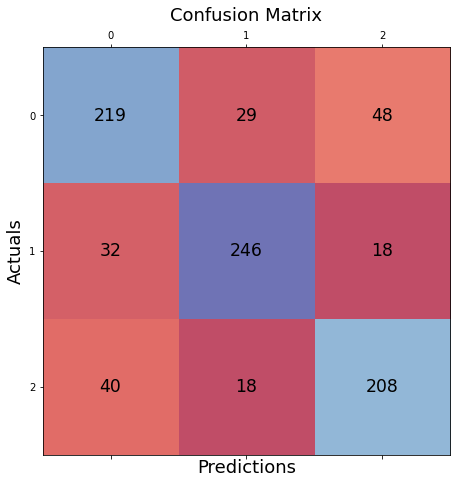

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap='RdYlBu', alpha=0.7)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        calm       0.75      0.74      0.75       296
       happy       0.84      0.83      0.84       296
         sad       0.76      0.78      0.77       266

    accuracy                           0.78       858
   macro avg       0.78      0.78      0.78       858
weighted avg       0.78      0.78      0.78       858



In [ ]:
# from sklearn.model_selection import GridSearchCV

# max_features=np.arange(1,100,1)
# n_estimators=np.arange(10,1000,10)
# param_grid=dict(max_features=max_features,n_estimators=n_estimators)

# grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=5)

In [ ]:
# grid.fit(x_train,y_train)

In [ ]:
# print("The best parameters are %s with a score %.2f"%(grid.best_params_,grid.best_score_))

##DL

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
df_dl=df
df_dl

,path,filename,dataset,duration,sample_rate,gender,age,emotion
0,/content/drive/MyDrive/Speech Emotion Recognit...,03-01-01-01-01-01-01.wav,RAVDESS,3.303,16000,male,26,calm
1,/content/drive/MyDrive/Speech Emotion Recognit...,03-01-01-01-01-02-01.wav,RAVDESS,3.337,16000,male,26,calm
2,/content/drive/MyDrive/Speech Emotion Recognit...,03-01-01-01-02-01-01.wav,RAVDESS,3.270,16000,male,26,calm
3,/content/drive/MyDrive/Speech Emotion Recognit...,03-01-01-01-02-02-01.wav,RAVDESS,3.170,16000,male,26,calm
4,/content/drive/MyDrive/Speech Emotion Recognit...,03-01-02-01-01-01-01.wav,RAVDESS,3.537,16000,male,26,calm
...,...,...,...,...,...,...,...,...
4560,/content/drive/MyDrive/Speech Emotion Recognit...,1062_TAI_NEU_XX.wav,CREMA-D,1.902,16000,male,56,calm
4561,/content/drive/MyDrive/Speech Emotion Recognit...,1062_TAI_SAD_XX.wav,CREMA-D,2.302,16000,male,56,sad
4562,/content/drive/MyDrive/Speech Emotion Recognit...,1062_TIE_HAP_XX.wav,CREMA-D,2.569,16000,male,56,happy
4563,/content/drive/MyDrive/Speech Emotion Recognit...,1062_TIE_NEU_XX.wav,CREMA-D,2.302,16000,male,56,calm


In [ ]:
df_dl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4565 entries, 0 to 4564
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   path         4565 non-null   object 
 1   filename     4565 non-null   object 
 2   dataset      4565 non-null   object 
 3   duration     4565 non-null   float64
 4   sample_rate  4565 non-null   int64  
 5   gender       4565 non-null   object 
 6   age          4565 non-null   int64  
 7   emotion      4565 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 285.4+ KB


In [ ]:
df_dl.columns

Index(['path', 'filename', 'dataset', 'duration', 'sample_rate', 'gender',
       'age', 'emotion'],
      dtype='object')

In [ ]:
df_dl['emotion'].replace({'happy':1,'calm':0,'sad':2}, inplace=True)
df_dl['gender'].replace({'female':0,'male':1}, inplace=True)

In [ ]:
X = df_dl[['sample_rate', 'gender']]
y = df_dl.emotion

In [ ]:
X.sample_rate.value_counts()

16000    3136
24414    1189
44100     240
Name: sample_rate, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, stratify=y, random_state=2401)

In [ ]:
X_train.shape, y_train.shape

((4108, 2), (4108,))

In [ ]:
# Scale the data
from sklearn.preprocessing import StandardScaler

# Create Standard scaler
scaler = StandardScaler()

# Rescale data
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [ ]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(8,"tanh",input_dim=X_train_s.shape[1]))
model.add(tf.keras.layers.Dense(16,"relu"))
model.add(tf.keras.layers.Dense(7,"softmax"))
model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["acc"])

epochs=101
history=model.fit(X_train_s, y_train, epochs=epochs, batch_size = 16,validation_split=0.15, shuffle=True, callbacks = [tf.keras.callbacks.EarlyStopping(
    monitor='val_acc',
    patience=10,
    restore_best_weights=True
)])

Epoch 1/101
219/219 [==============================] - 1s 3ms/step - loss: 1.7860 - acc: 0.2781 - val_loss: 1.5423 - val_acc: 0.3420
Epoch 2/101
219/219 [==============================] - 0s 2ms/step - loss: 1.4078 - acc: 0.3432 - val_loss: 1.3111 - val_acc: 0.3485
Epoch 3/101
219/219 [==============================] - 0s 2ms/step - loss: 1.2487 - acc: 0.3386 - val_loss: 1.2067 - val_acc: 0.3420
Epoch 4/101
219/219 [==============================] - 0s 2ms/step - loss: 1.1792 - acc: 0.3435 - val_loss: 1.1593 - val_acc: 0.3549
Epoch 5/101
219/219 [==============================] - 0s 2ms/step - loss: 1.1474 - acc: 0.3463 - val_loss: 1.1363 - val_acc: 0.3549
Epoch 6/101
219/219 [==============================] - 0s 2ms/step - loss: 1.1303 - acc: 0.3406 - val_loss: 1.1240 - val_acc: 0.3420
Epoch 7/101
219/219 [==============================] - 0s 2ms/step - loss: 1.1205 - acc: 0.3331 - val_loss: 1.1163 - val_acc: 0.3420
Epoch 8/101
219/219 [==============================] - 0s 2ms/step - 

In [ ]:
model.summary()

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(epochs),history.history['accuracy'],label='Training Accuracy',color='r')
plt.plot(range(epochs),history.history['val_accuracy'],label='Validation Accuracy',color='black')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.title('Accuracy v/s Time')

plt.show()

#CNN

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(90000, 32, input_length=X_train_s.shape[1]))
model.add(tf.keras.layers.SpatialDropout1D(0.2))
model.add(tf.keras.layers.Conv1D(256,5,activation='tanh',padding='same'))
model.add(tf.keras.layers.SpatialDropout1D(0.2))
model.add(tf.keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(tf.keras.layers.Conv1D(256,3,activation='relu',padding='same'))
model.add(tf.keras.layers.SpatialDropout1D(0.2))
model.add(tf.keras.layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=False))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(7,activation='softmax'))
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=keras.optimizers.Adam(learning_rate=0.002529), metrics=["acc"])
model.summary()

ValueError: ignored

In [ ]:
epochs=1000
history=model.fit(X_train_s, y_train, epochs=epochs, batch_size = 16,validation_split=0.15,callbacks = [tf.keras.callbacks.EarlyStopping(
    monitor='val_acc',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)])

Epoch 1/1000
219/219 [==============================] - 10s 46ms/step - loss: 1.1018 - acc: 0.3457 - val_loss: 1.1091 - val_acc: 0.3387
Epoch 2/1000
219/219 [==============================] - 12s 53ms/step - loss: 1.0999 - acc: 0.3500 - val_loss: 1.0972 - val_acc: 0.3339
Epoch 3/1000
210/219 [===========================>..] - ETA: 0s - loss: 1.1005 - acc: 0.3494

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(X_test_s,y_test)

In [ ]:
plt.figure(figsize=(12,6))
epochs = len(history.history['binary_accuracy'])
plt.plot(range(epochs),history.history['binary_accuracy'],label='Training Accuracy',color='r')
plt.plot(range(epochs),history.history['val_binary_accuracy'],label='Validation Accuracy',color='black')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.title('Accuracy v/s Time')

plt.show()